In [10]:
from matplotlib.pyplot import hist, show
from collections import Counter
import urllib
import codecs
from nltk.stem import WordNetLemmatizer

## Czytania danego dnia

In [17]:
#downloading the webpage
import requests
import datetime

now = datetime.datetime.now()
year = str(now.year)
month = str(now.month)
if len(month) == 1:
    month = "0" + month
day = str(now.day)
ymd = year+month+day

    
#address = "http://mateusz.pl/czytania/" + year + "/" + ymd + ".html"
address = "http://mateusz.pl/czytania/2018/20180909.html" #niedziela
page = requests.get(address)

In [18]:
#parsing a page
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [19]:
#print(soup.prettify()) 
#Exception handling for more readings
try:
    section = list(soup.children)[9]
    section_content = section.find_all('p')
except:
    section = soup.find_all('section')[0]
    section_content =section.find_all('p')

In [20]:
len(section_content)

8

In [21]:
pierwsze_czytanie = section_content[0]
pierwsze_czytanie

<p>(Iz 35, 4-7a)<br/>
      Powiedzcie małodusznym: "Odwagi! Nie bójcie się! Oto wasz Bóg, oto pomsta; przychodzi Boża odpłata; On sam przychodzi, by was zbawić". Wtedy przejrzą oczy niewidomych i uszy głuchych się otworzą. Wtedy chromy wyskoczy jak jeleń i język niemych wesoło wykrzyknie. Bo trysną zdroje wód na pustyni i strumienie na stepie; spieczona ziemia zmieni się w pojezierze, spragniony kraj w krynice wód.</p>

In [22]:
ewangelia = section_content[len(section_content)-1]
ewangelia

<p>(Mk 7, 31-37)<br/>
		Jezus opuścił okolice Tyru i przez Sydon przyszedł nad Jezioro Galilejskie, przemierzając posiadłości Dekapolu. Przyprowadzili Mu głuchoniemego i prosili Go, żeby położył na niego rękę. On wziął go na bok, z dala od tłumu, włożył palce w jego uszy i śliną dotknął mu języka; a spojrzawszy w niebo, westchnął i rzekł do niego: "Effatha", to znaczy: Otwórz się. Zaraz otworzyły się jego uszy, więzy języka się rozwiązały i mógł prawidłowo mówić. Jezus przykazał im, żeby nikomu nie mówili. Lecz im bardziej przykazywał, tym gorliwiej to rozgłaszali. I przepełnieni zdumieniem mówili: "Dobrze wszystko uczynił. Nawet głuchym słuch przywraca i niemym mowę".</p>

## Noise removal

In [23]:
import re
text = str(ewangelia)

def clean_html(raw):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, '', raw)
    return cleantext

def clean_proverbs (raw):
    cleaner = re.compile('\([^)]*\)')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_indent(raw):
    cleaner = re.compile('^\s+')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_text(raw):
    text = clean_html(raw)
    text = clean_proverbs(text)
    text = clean_indent(text)
    return text

In [24]:
clean_text = clean_text(text)
clean_text

'Jezus opuścił okolice Tyru i przez Sydon przyszedł nad Jezioro Galilejskie, przemierzając posiadłości Dekapolu. Przyprowadzili Mu głuchoniemego i prosili Go, żeby położył na niego rękę. On wziął go na bok, z dala od tłumu, włożył palce w jego uszy i śliną dotknął mu języka; a spojrzawszy w niebo, westchnął i rzekł do niego: "Effatha", to znaczy: Otwórz się. Zaraz otworzyły się jego uszy, więzy języka się rozwiązały i mógł prawidłowo mówić. Jezus przykazał im, żeby nikomu nie mówili. Lecz im bardziej przykazywał, tym gorliwiej to rozgłaszali. I przepełnieni zdumieniem mówili: "Dobrze wszystko uczynił. Nawet głuchym słuch przywraca i niemym mowę".'

## Tokenization & Segmentation

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
text = clean_text

In [26]:
sentences = sent_tokenize(text)
#sentences

In [27]:
tokens = word_tokenize(text)
lower_tokens = [t.lower() for t in tokens]
#lower_tokens

## Normalization / Preprocessing

#### Lemmatyzacja (lemmatisation) 
Algorytm znajdowania lemmy, formy podstawowej wyrazu w obszarze części mowy którą reprezentuje. Inaczej: wyszukiwanie formy kanonicznej leksemu. W komputerowej analizie języka naturalnego lemmatyzacja jest operacją bardziej precyzyjną niż stemmatyzacja. 

#### Stemmatyzacja (stemming) 
Sprowadzenie wyrazu reprezentującego dowolną część mowy do stemu, rdzenia postaci źródłowej, najczęściej rzeczownika, bądź niekiedy nawet sekwencji znaków nie mającej samodzielnego znaczenia w języku naturalnym. 

In [28]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
#alpha_only

In [37]:
#Read polish stopwords file
polish_stops = codecs.open("polishStopWords",'r','utf-8')
ps = polish_stops.read().split('\n')
polish_stops.close()

In [30]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in ps]
#no_stops

## Topic identification
To do:
- tf-idf
- Named-entity recognition

### Bag of words

In [31]:
bow = Counter(no_stops)

In [32]:
bow.most_common(10)

[('jezus', 2),
 ('uszy', 2),
 ('języka', 2),
 ('mówili', 2),
 ('opuścił', 1),
 ('okolice', 1),
 ('tyru', 1),
 ('sydon', 1),
 ('przyszedł', 1),
 ('jezioro', 1)]

### Word cloud

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

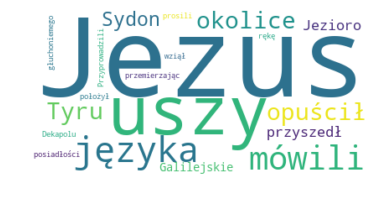

In [36]:
text = clean_text

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = ps, max_font_size=200, max_words=20, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Term frequency

In [ ]:
from nltk.probability import FreqDist

In [49]:
fdist = FreqDist(no_stops)

In [50]:
fdist

FreqDist({'jezus': 2, 'uszy': 2, 'języka': 2, 'mówili': 2, 'opuścił': 1, 'okolice': 1, 'tyru': 1, 'sydon': 1, 'przyszedł': 1, 'jezioro': 1, ...})

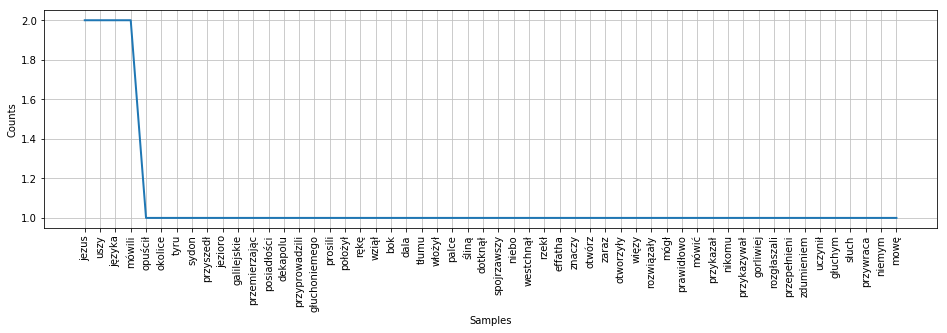

In [78]:
plt.figure(figsize=(16,4))
fdist_plot = fdist.plot()
plt.show()

### Tf-idf 

#### Term frequency - inverse document frequency
Ważenie częstością termów - odwrotna częstość w dokumentach - jedna z metod obliczania wagi słów w oparciu o liczbę ich wystąpień, należąca do grupy algorytmów obliczających statystyczne wagi termów. 
- Każdy dokument reprezentowany jest przez wektor, składający się z wag słów występujących w tym dokumencie. 
- TFIDF informuje o częstości wystąpienia termów uwzględniając jednocześnie odpowiednie wyważenie znaczenia lokalnego termu i jego znaczenia w kontekście pełnej kolekcji dokumentów. 

https://pl.wikipedia.org/wiki/TFIDF

In [43]:
from nltk.corpus import stopwords

In [44]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


## Classification ?

### Other stuff

In [18]:
milujcie_sent = milujcie.read().split('\r\n')

NameError: name 'milujcie' is not defined

In [ ]:
song = ""
for sentence in milujcie_sent:
    song = song + sentence

In [ ]:
text = milosc.read()
#text = song

In [ ]:
milujcie = codecs.open("milujcie",'r','utf-8')